# Automated Coexpression Analysis

Need to build the below such that:
1) a two-color image can be taken as input
2) script prompts for either a directory or a file
3) script indicates where data is being written to
4) (reach) increase brightness, perform median analysis on lsm images and convert to png to sidestep imagej
5) (reach) use to generate a web app


In [ ]:


#from matplotlib import pyplot as plt

(-0.5, 671.5, 647.5, -0.5)

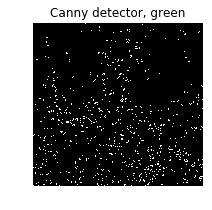

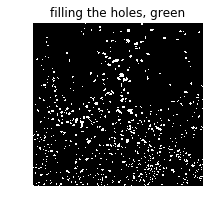

In [20]:
import cv2
from skimage import color
from skimage import io
from skimage import data
from skimage.feature import canny
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from scipy import ndimage as ndi


coins_green = io.imread('TestImages/MedianFilterGreen.png', as_grey=True)
hist_green = np.histogram(coins_green, bins=np.arange(0, 256))



edges_green = canny(coins_green)

fig_green, ax_green = plt.subplots(figsize=(4, 3))
ax_green.imshow(edges_green, cmap=plt.cm.gray, interpolation='nearest')
ax_green.set_title('Canny detector, green')
ax_green.axis('off')


fill_coins_green = ndi.binary_fill_holes(edges_green)

fig_green, ax_green = plt.subplots(figsize=(4, 3))
ax_green.imshow(fill_coins_green, cmap=plt.cm.gray, interpolation='nearest')
ax_green.set_title('filling the holes, green')
ax_green.axis('off')

347


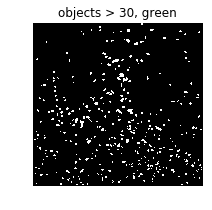

In [24]:
from skimage import morphology

coins_cleaned_green = morphology.remove_small_objects(fill_coins_green, 20)

fig_green, ax_green = plt.subplots(figsize=(4, 3))
ax_green.imshow(coins_cleaned_green, cmap=plt.cm.gray, interpolation='nearest')
ax_green.set_title('objects > 30, green')
ax_green.axis('off')
label_im_green, nb_labels_green = ndimage.label(coins_cleaned_green, structure=None)
print(nb_labels_green)

315


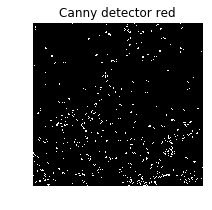

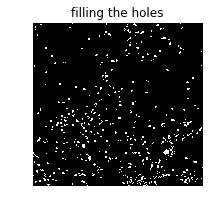

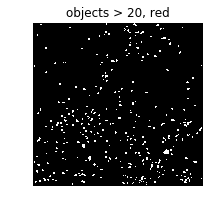

In [25]:
#next need to apply this mask to mask generated from other color
coins_red = io.imread('TestImages/MedianFilterRed.png', as_grey=True)
hist_red = np.histogram(coins_red, bins=np.arange(0, 256))

from skimage.feature import canny

edges_red = canny(coins_red)

fig_red, ax_red = plt.subplots(figsize=(4, 3))
ax_red.imshow(edges_red, cmap=plt.cm.gray, interpolation='nearest')
ax_red.set_title('Canny detector red')
ax_red.axis('off')
from scipy import ndimage as ndi

fill_coins_red = ndi.binary_fill_holes(edges_red)

fig_red, ax_red = plt.subplots(figsize=(4, 3))
ax_red.imshow(fill_coins_red, cmap=plt.cm.gray, interpolation='nearest')
ax_red.set_title('filling the holes')
ax_red.axis('off')
coins_cleaned_red = morphology.remove_small_objects(fill_coins_red, 20)

fig_red, ax_red = plt.subplots(figsize=(4, 3))
ax_red.imshow(coins_cleaned_red, cmap=plt.cm.gray, interpolation='nearest')
ax_red.set_title('objects > 20, red')
ax_red.axis('off')
label_im_red, nb_labels_red = ndimage.label(coins_cleaned_red, structure=None)
print(nb_labels_red)

boolean filter result:  1803
1526 overlay count
0.003504372427983539 mean overlay size
38 overlapping cells


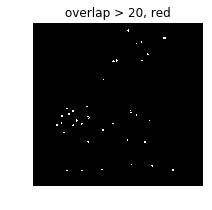

In [33]:
#Find overlapping cells. First use boolean mask, then size select. 

overlap = np.array(coins_cleaned_green & coins_cleaned_red)
print('boolean filter result: ',np.sum(overlap))


coins_cleaned_overlay = morphology.remove_small_objects(overlap, 20)
print(np.sum(coins_cleaned_overlay), 'overlay count')
print(np.mean(coins_cleaned_overlay), 'mean overlay size')
fig_overlap, ax_overlap = plt.subplots(figsize=(4, 3))
#ax_overlap.imshow(overlap, cmap=plt.cm.gray, interpolation='nearest')
ax_overlap.imshow(coins_cleaned_overlay, cmap=plt.cm.gray, interpolation='nearest')
ax_overlap.set_title('overlap > 20, red')
ax_overlap.axis('off')
#label_im_overlap, nb_labels_overlap = ndimage.label(overlap, structure=None)
label_im_overlap, nb_labels_overlap = ndimage.label(coins_cleaned_overlay, structure=None)
print(nb_labels_overlap, 'overlapping cells')


In [32]:
###Finally, write results to csv file:

import csv   
fields=['first','second','third']
with open(r'name', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(fields)

In [19]:
#could also use the below. We will want to write columns for the file name, dimensions, number of cells in each channel, 
#number of overlapping cells, and the cell size filter that has been selected. 

with open('persons.csv', 'wb') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Name', 'Profession'])
    filewriter.writerow(['Derek', 'Software Developer'])
    filewriter.writerow(['Steve', 'Software Developer'])
    filewriter.writerow(['Paul', 'Manager'])

/Users/ryan/Desktop/Python
